# Neural Network
Thông tin thành viên(Họ tên - MSSV):
- Thành viên 1: Võ Trung Tín - 22127417
- Thành viên 2: Nguyễn Trần Đức Thiện - 22127397

## Kiểm tra môi trường code

In [1]:
import sys
sys.executable

'c:\\Users\\DUC THIEN\\.conda\\envs\\ml-env\\python.exe'

## Import các thư viện cần thiết

In [2]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

## Đọc và kiểm tra tập dữ liệu import từ thư viện

In [3]:
np.random.seed(0) # tạo ra số giả ngẫu nhiên dựa trên giá trị seed 
(train_X, train_y),(test_X, test_y)=cifar10.load_data() # tải tập dữ liệu lên và lưu vào 4 mảng train_X, train_y và test_X, test_y
print('Số ảnh dùng để train:',len(train_X))
print('Số ảnh dùng để test :',len(test_X))
print('Kích cỡ ảnh train :',train_X.shape)
print('Kích cỡ train_label :',train_y.shape)
print('Kích cỡ ảnh test :',test_X.shape)
print('Kích cỡ test_label :',test_y.shape)

print('Ma trận pixel của một bức tranh:\n', train_X[0])

Số ảnh dùng để train: 50000
Số ảnh dùng để test : 10000
Kích cỡ ảnh train : (50000, 32, 32, 3)
Kích cỡ train_label : (50000, 1)
Kích cỡ ảnh test : (10000, 32, 32, 3)
Kích cỡ test_label : (10000, 1)
Ma trận pixel của một bức tranh:
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Nhìn vào các pixel của bức tranh ta thấy đây là một ma trận 3 chiều

## Khám phá dữ liệu huấn luyện

Ta hãy thử xem mặt mũi của vài ảnh trong `train_X` với label trong `train_y`

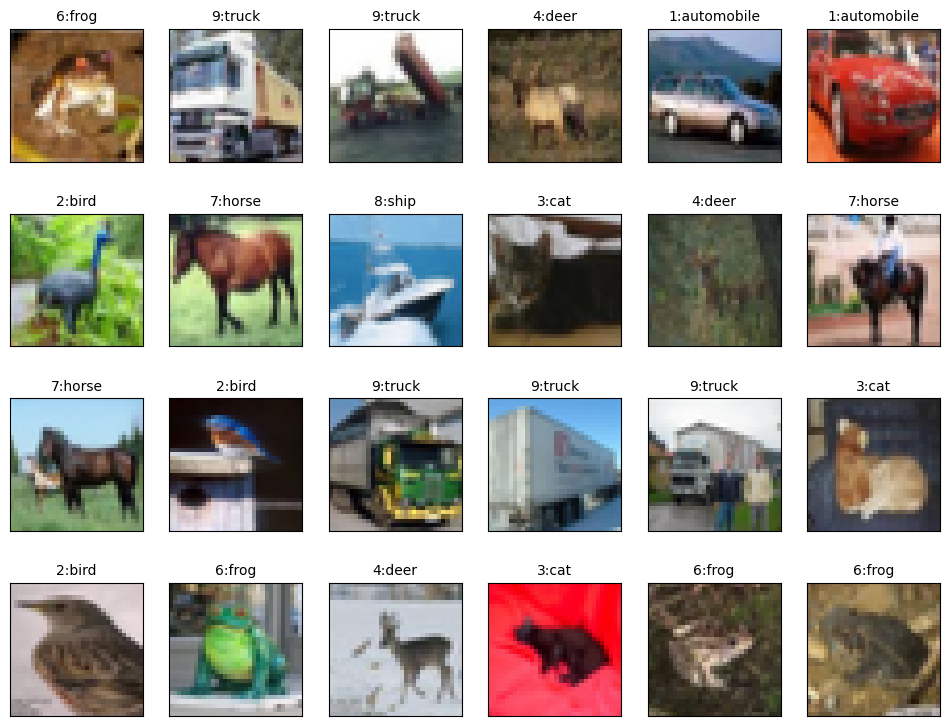

In [4]:
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
            5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}
# Tạo một từ điển và gán các giá trị từ 0 đến 9 cho các loại ảnh tương ứng với 10 classes

def showImageandLabel(images, labels,  idx, num=10):
    fig = plt.gcf() # lấy số liệu của 1 hình ảnh và gán cho fig
    
    fig.set_size_inches(12, 14) # kiểm soát kích thước hình ảnh
    
    if num>25: num=25  #Hiển thị lên đến 25
    
    for i in range(0, num):
        ax=plt.subplot(6,6, 1+i)
        ax.imshow(images[idx],cmap='binary') # hiển thị dữ liệu dưới dạng hình ảnh, cmap để ánh xạ dữ liệu vô hướng với màu sắc và ở đây là loại binary
        title=str(labels[i][0])+':'+label_dict[labels[i][0]]# Danh mục tương ứng với hình thứ i
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]); # để đặt các vị trí xtick trên trục x nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy
        ax.set_yticks([])  # để đặt các vị trí ytick trên trục y nhưng bên trong là chuỗi rỗng nên các giá trị tick sẽ không nhìn thấy      
        idx+=1 
    
    plt.show()

showImageandLabel(train_X, train_y, 0, 24) #In 12 ảnh

Tiếp theo, ta hãy xem các giá trị có thể có của `train_y` và số lượng của mỗi giá trị này.

In [5]:
values, counts = np.unique(train_y, return_counts=True)
for value, count in zip(values, counts):
    print(f'Value: {value}, count: {count}')

Value: 0, count: 5000
Value: 1, count: 5000
Value: 2, count: 5000
Value: 3, count: 5000
Value: 4, count: 5000
Value: 5, count: 5000
Value: 6, count: 5000
Value: 7, count: 5000
Value: 8, count: 5000
Value: 9, count: 5000


Như vậy là `train_y` có 10 giá trị có thể có ứng với 10 chữ số từ 0 đến 9 (là 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck)). Và số lượng ảnh tương ứng mỗi chữ số bằng nhau.

## Tiền xử lý dữ liệu huấn luyện

(1) Normalize the image data

In [6]:
# Chuẩn hóa pixel từ [0.0 , 255.0] về [0.0, 1.0]
x_train_normalize = train_X.astype('float32') / 255.0  
x_test_normalize = test_X.astype('float32') / 255.0

#Kiểm tra sau khi chuẩn hóa
print(train_X[0][0][0]) # Ban đầu
print(x_train_normalize[0][0][0]) # Đã chuẩn hóa 

[59 62 63]
[0.23137255 0.24313726 0.24705882]


(2) Flatten the image data

In [7]:
# Làm phẳng dữ liệu từ (32, 32, 3) -> (3072,)
x_train = x_train_normalize.reshape(-1, 3072)
x_test = x_test_normalize.reshape(-1, 3072)

# Làm phẳng y_batch thành vector 1 chiều
y_train_Flatten = train_y.reshape(-1)
y_test_Flatten = test_y.reshape(-1)

#Kiểm tra sau khi làm phẳng dữ liệu
print(x_train[0])    # In toàn bộ vector của hình ảnh đầu tiên
print(y_train_Flatten)       # In toàn bộ y_batch 

[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]
[6 9 9 ... 9 1 1]


(3) Apply one-hot encoding to the output y_batch

In [8]:
# Chuyển labels thành one-hot vector
y_train = np.eye(10)[y_train_Flatten]
y_test = np.eye(10)[y_test_Flatten]

# Kiểm tra sau khi chuyển labels thành one-hot vector
print(y_train.shape)
print(y_train[:5])


(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Dữ liệu huấn luyện sau khi xử lý lưu trong 4 mảng:
- `x_train`, `x_test`
- `y_train`, `y_test`

## Tìm mô hình Neural Network từ dữ liệu huấn luyện

## Sử dụng PyTorch

### Tiền xử lý phù hợp với PyTorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Chuyển sang Tensor của PyTorch
# Tensor là kiểu dữ liệu cơ bản của PyTorch để sử dụng GPU và các phép tính toán tensor, xử lý nhanh hơn so với numpy array
# Tensor trở thành cốt lõi trong việc xây dựng các mô hình học sâu hiệu quả và hiện đại.
X_train_tensor = torch.tensor(x_train, dtype=torch.float32) # Kiểu dữ liệu số thực 32-bit (phù hợp cho tính toán học sâu)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32) 

y_train_tensor = torch.tensor(y_train_Flatten, dtype=torch.long) # Kiểu số nguyên 64-bit (phù hợp cho bài toán phân loại)
y_test_tensor = torch.tensor(y_test_Flatten, dtype=torch.long) 

# Tạo TensorDataset 
# Kết hợp các Tensor đầu vào và nhãn thành một tập dữ liệu (dataset) có thể quản lý dễ dàng.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor) # Tập train
test_dataset = TensorDataset(X_test_tensor, y_test_tensor) # Tập test

# Tạo DataLoader
# Chia dữ liệu thành các batch nhỏ => Sử dụng tài nguyên hiệu quả hơn (đặc biệt khi huấn luyện trên GPU)
# Tự động quản lý thứ tự dữ liệu, xáo trộn (shuffle), và tạo iterator để duyệt qua các batch.
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # Xáo trộn dữ liệu sau mỗi epoch để tăng hiệu quả huấn luyện.
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # Không xáo trộn dữ liệu để đảm bảo tính nhất quán khi đánh giá.

### Xây dựng mô hình MLP

In [10]:
class MLP_PyTorch(nn.Module):
    # nn.Module là class cơ bản mà tất cả model NN trong PyTorch đều kế thừa 
    # Cung cấp thuộc tính, phương pháp cơ bản để train, build, save model
    def __init__(self):
        super(MLP_PyTorch, self).__init__() # Khởi tạo đảm bảo các chức năng của nn.Module đều hoạt động
        
        # Fully connected layer 1  
        # Input : 3072 chiều 
        # Output : 512 chiều 
        self.fc1 = nn.Linear(3072, 512)   # Input -> Hidden layer 1
        
        # Batch Normalization cho layer 1 (512 chiều) 
        # Chuẩn hóa dữ liệu trong mỗi batch để giữ giá trị đầu ra có phân phối ổn định (trung bình = 0, phương sai = 1)
        self.bn1 = nn.BatchNorm1d(512)    
        

        self.fc2 = nn.Linear(512, 256)    # Hidden layer 1 -> Hidden layer 2
        self.bn2 = nn.BatchNorm1d(256)    # Batch Normalization cho layer 2
        
        self.fc3 = nn.Linear(256, 128)    # Hidden layer 2 -> Hidden layer 3
        self.bn3 = nn.BatchNorm1d(128)    # Batch Normalization cho layer 3

        self.fc4 = nn.Linear(128, 10)     # Tầng đầu ra, giảm từ 256 chiều xuống 10 chiều (phù hợp cho bài toán phân loại 10 lớp của CIFAR-10).
        
        # Hàm kích hoạt ReLU (Rectified Linear Unit) được áp dụng sau mỗi tầng ẩn để thêm phi tuyến tính.
        # Công thức đơn giản : f(x) = max(0,x)
        # ReLU giúp tránh hiện tượng vanishing gradient vì gradient của ReLU là 1 khi x > 0
        # Nhược điểm : 
        # - Khi x <= 0 gradient của ReLU bằng 0. Điều này có thể khiến một số neuron "chết" (không cập nhật được trọng số trong suốt quá trình huấn luyện).
        # - Đầu ra của ReLU không cân bằng quanh gốc tọa độ (mean ≠ 0), có thể làm chậm tốc độ hội tụ trong quá trình huấn luyện 
        self.relu = nn.ReLU() 
        self.dropout = nn.Dropout(0.3)  # Dropout 30%

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)      # BatchNorm layer 1
        x = self.relu(x)

        x = self.fc2(x)
        x = self.bn2(x)      # BatchNorm layer 2
        x = self.relu(x)
        
        x = self.fc3(x)
        x = self.bn3(x)      # BatchNorm layer 3
        x = self.relu(x)
        x = self.dropout(x) # Dropout layer cuối

        x = self.fc4(x)      # Output layer
        return x

### Khởi tạo mô hình

In [11]:
# Kiểm tra GPU
# Việc sử dụng GPU giúp tăng tốc quá trình huấn luyện, đặc biệt khi làm việc với dữ liệu lớn hoặc mô hình phức tạp.
# Nếu GPU khả dụng: cuda
# Nếu không: cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Khởi tạo mô hình
# Đưa mô hình sang thiết bị (GPU hoặc CPU) để đảm bảo tính nhất quán khi tính toán.
# Giúp mô hình hoạt động trên thiết bị được chọn, đồng bộ với dữ liệu (dữ liệu huấn luyện cũng cần chuyển sang thiết bị tương ứng)
model = MLP_PyTorch().to(device) 

# Tính toán sự khác biệt giữa đầu ra dự đoán của mô hình và nhãn thực tế bằng công thức cross-entropy
# Tự động áp dụng Softmax trên đầu ra để chuẩn hóa thành xác suất
# Sau đó tính toán giá trị mất mát dựa trên cross-entropy
loss_criterion = nn.CrossEntropyLoss()  # Loss cho bài toán phân loại

# Đây là bộ tối ưu hóa dựa trên thuật toán Adam (Adaptive Moment Estimation).
# Adam kết hợp ưu điểm của SGD (Stochastic Gradient Descent) và Momentum, giúp huấn luyện nhanh và hiệu quả hơn.
# Sau đó lấy tất cả các tham số của mô hình (các trọng số và bias) để tối ưu hóa.
# Hệ số learning rate điều chỉnh mức độ thay đổi của W trong mỗi lần cập nhật
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Thêm scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

print(model)  # In kiến trúc mô hình

Using device: cpu
MLP_PyTorch(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
)


### Huấn luyện mô hình

Epoch [1/20], Loss: 1.6513
Epoch [2/20], Loss: 1.4290
Epoch [3/20], Loss: 1.3206
Epoch [4/20], Loss: 1.2363
Epoch [5/20], Loss: 1.1687
Epoch [6/20], Loss: 1.1044
Epoch [7/20], Loss: 1.0460
Epoch [8/20], Loss: 0.9847
Epoch [9/20], Loss: 0.9191
Epoch [10/20], Loss: 0.8620
Epoch [11/20], Loss: 0.6975
Epoch [12/20], Loss: 0.6316
Epoch [13/20], Loss: 0.5825
Epoch [14/20], Loss: 0.5320
Epoch [15/20], Loss: 0.4890
Epoch [16/20], Loss: 0.4498
Epoch [17/20], Loss: 0.4111
Epoch [18/20], Loss: 0.3838
Epoch [19/20], Loss: 0.3552
Epoch [20/20], Loss: 0.3237
Training Time: 114.90 seconds


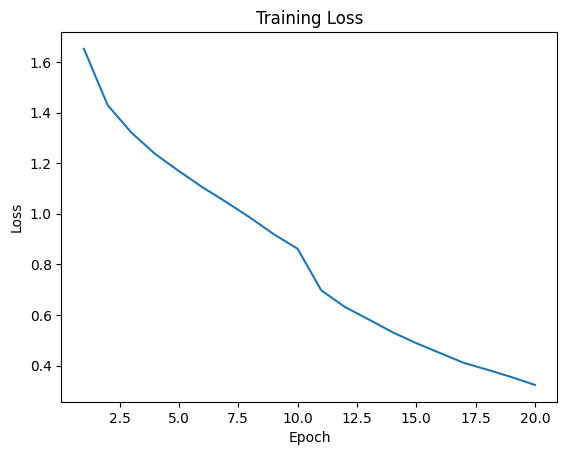

In [12]:
import time

# Huấn luyện mô hình
epochs = 20
start_time = time.time() # Thời gian bắt đầu
loss_values = []  # Lưu giá trị loss qua từng epoch

for epoch in range(epochs):
    model.train() # Chuyển mô hình sang chế độ huấn luyện, đảm bảo các cơ chế như dropout và batch normalization hoạt động đúng
    running_loss = 0.0 # Tổng giá trị loss của tất cả các batch trong 1 epoch
    
    for X_batch, y_batch in train_loader: # Mỗi batch chứa data và label tương ứng của tập dữ liệu 
        X_batch, y_batch = X_batch.to(device), y_batch.to(device) # Chuyển dữ liệu và nhãn sang thiết bị (GPU hoặc CPU) để tính toán
        
        optimizer.zero_grad()  # Xóa gradient cũ, vì khi không xóa gradient sẽ cộng dồn gây sai lệch
        pre = model(X_batch)  # Forward : Nhận vào X_batch và trả về dự đoán output
        loss = loss_criterion(pre, y_batch)  # Tính loss giữa dự đoán và thực tế
        loss.backward()  # Tính gradient của loss với các tham số của mô hình (backpropagation)
        optimizer.step()  # Cập nhật trọng số mô hình dựa trên gradient vừa tính toán
        
        running_loss += loss.item()
    
    scheduler.step()
    
    epoch_loss = running_loss / len(train_loader) # Loss trung bình tất cả batch từng epoch
    loss_values.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

end_time = time.time() # Thời gian kết thúc
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Vẽ đồ thị loss
plt.plot(range(1, epochs + 1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Đánh giá mô hình

In [13]:
# Chuyển mô hình sang evaluation mode
# Dropout: Trong chế độ đánh giá, Dropout sẽ bị tắt (không ngẫu nhiên loại bỏ neuron nào)
# Batch Normalization: Sử dụng giá trị trung bình và phương sai được tính trong quá trình huấn luyện, thay vì cập nhật từ batch hiện tại
# => Đảm bảo rằng mô hình đưa ra dự đoán ổn định và chính xác
model.eval()
correct = 0
total = 0

# Tắt tính gradient trong quá trình đánh giá
# Giảm bộ nhớ và tăng tóc độ (không cần cập nhật W, không lưu trữ gradient)
with torch.no_grad():
    for X_batch, y_batch in test_loader: # Mỗi batch chứa data và label tương ứng của tập kiểm tra
        X_batch, y_batch = X_batch.to(device), y_batch.to(device) # Chuyển dữ liệu và nhãn sang thiết bị (GPU hoặc CPU) để tính toán
        outputs = model(X_batch) # Forward : Nhận vào X_batch và trả về dự đoán output
        _, predicted = torch.max(outputs, 1) # Trả về giá trị lớn nhất đại diện cho lớp có xác suất cao nhất (Softmax) và label dự đoán của nó tức index (tương ứng với các lớp)
        total += y_batch.size(0) # Lấy số lượng mẫu trong batch hiện tại
        # So sánh nhãn dự đoán (predicted) với nhãn thực tế (y_batch), trả về true nếu giống và false nếu khác
        # Tính tổng số giá trị True (số lượng dự đoán đúng) trong tensor và chuyển thành số Python
        correct += (predicted == y_batch).sum().item() 

accuracy = 100 * correct / total # Độ chính xác 
print(f"Accuracy on test set: {accuracy:.2f}%")

Accuracy on test set: 53.74%


## Sử dụng PyTorch Lightning

### Tiền xử lý PyTorch Lightning tương tự như PyTorch truyền thống nên không cần ghi lại phần này

In [18]:
# Import thư viện mới 
from sklearn.metrics import classification_report, confusion_matrix
import pytorch_lightning as pl
import seaborn as sns
import torch.nn.functional as F
from pytorch_lightning import Trainer
from torch.optim import Adam

### Xây dựng mô hình MLP


In [19]:

class MLP_PyTorchLightning(pl.LightningModule):
    def __init__(self):
        super(MLP_PyTorchLightning, self).__init__()
        
        # Fully connected layer 1
        self.fc1 = nn.Linear(3072, 512)
        self.bn1 = nn.BatchNorm1d(512)
        
        # Fully connected layer 2
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        
        # Fully connected layer 3
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        
        # Output layer
        self.fc4 = nn.Linear(128, 10)
        
        # Activation and Dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

        # Loss function
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))  # Layer 1
        x = self.relu(self.bn2(self.fc2(x)))  # Layer 2
        x = self.relu(self.bn3(self.fc3(x)))  # Layer 3
        x = self.dropout(x)                  # Dropout layer
        x = self.fc4(x)                      # Output layer
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        loss = self.loss_fn(preds, y)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)
        loss = self.loss_fn(preds, y)
        acc = (preds.argmax(dim=1) == y).float().mean()
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        self.log("val_acc", acc, on_epoch=True, prog_bar=True)
        return {"val_loss": loss, "val_acc": acc}

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.001)
    
# Huấn luyện mô hình và ghi lại giá trị loss
class TrainingCallback(pl.Callback):
    def __init__(self):
        self.loss_values = []  # Lưu loss qua từng epoch

    def on_train_epoch_end(self, trainer, pl_module):
        # Lấy giá trị loss trung bình của epoch từ logger
        epoch_loss = trainer.callback_metrics['train_loss'].item()
        self.loss_values.append(epoch_loss)

### Khởi tạo và huấn luyện mô hình

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name    | Type             | Params | Mode 
-----------------------------------------------------
0 | fc1     | Linear           | 1.6 M  | train
1 | bn1     | BatchNorm1d      | 1.0 K  | train
2 | fc2     | Linear           | 131 K  | train
3 | bn2     | BatchNorm1d      | 512    | train
4 | fc3     | Linear           | 32.9 K | train
5 | bn3     | BatchNorm1d      | 256    | train
6 | fc4     | Linear           | 1.3 K  | train
7 | relu    | ReLU             | 0      | train
8 | dropout | Dropout          | 0      | train
9 | loss_fn | CrossEntropyLoss | 0      | train
-----------------------------------------------------
1.7 M     Trainable params
0         Non-trainable params
1.7 M     Total params
6.963     Total estimated model params size (MB)
10        Modules in train mode
0         Modules in eval mode


C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\DUC THIEN\AppData\Roaming\Python\Python311\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 19: 100%|██████████| 391/391 [00:09<00:00, 40.35it/s, v_num=3, train_loss_step=0.471, val_loss=1.930, val_acc=0.540, train_loss_epoch=0.420]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 391/391 [00:09<00:00, 40.05it/s, v_num=3, train_loss_step=0.471, val_loss=1.930, val_acc=0.540, train_loss_epoch=0.420]
Training Time: 199.09 seconds


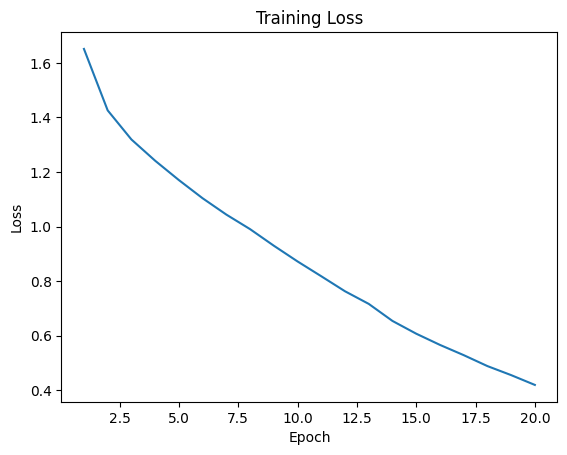

In [20]:
# Khởi tạo mô hình
model = MLP_PyTorchLightning()
callback = TrainingCallback()

# Huấn luyện với Trainer
trainer = pl.Trainer(max_epochs=20, accelerator="auto", callbacks=[callback])  # Sử dụng GPU nếu có
start_time = time.time()  # Thời gian bắt đầu huấn luyện
trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=test_loader)
end_time = time.time()  # Thời gian kết thúc huấn luyện

# Thời gian huấn luyện
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Vẽ đồ thị loss qua từng epoch
plt.plot(range(1, len(callback.loss_values) + 1), callback.loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Đánh giá mô hình

In [21]:
# Đánh giá mô hình trên tập test
model.eval()  # Chuyển mô hình sang chế độ đánh giá
correct = 0
total = 0

# Tắt gradient để giảm bộ nhớ và tăng tốc độ
with torch.no_grad():
    for X_batch, y_batch in test_loader:  # Lặp qua từng batch trong tập test
        X_batch, y_batch = X_batch.to(model.device), y_batch.to(model.device)  # Chuyển dữ liệu sang thiết bị
        outputs = model(X_batch)  # Forward pass: Nhận đầu ra từ mô hình
        _, predicted = torch.max(outputs, 1)  # Lấy lớp dự đoán (chỉ số của giá trị lớn nhất)
        total += y_batch.size(0)  # Tổng số mẫu
        correct += (predicted == y_batch).sum().item()  # Tổng số dự đoán đúng

# Tính toán độ chính xác
accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")


Accuracy on test set: 54.02%
